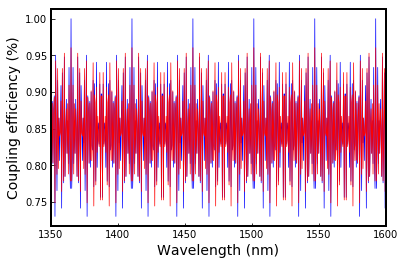

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

lambda_array = np.linspace(1.35, 1.6, 501)
k_0 = 2*np.pi/(lambda_array)
n_core = 1.82
a = 10
def nm(m):
    return n_core - ((4*m - 1)**2)*((np.pi)**2)/ (32* (k_0**2)* n_core* (a**2))
L = 12* 10**6
inta_d = {}
inta_m = [0.92, 0.04, 0.02, 0.01, 0.01]
for i, i_m in enumerate(inta_m):
    n_m = nm(i+1)
    inta = i_m*np.exp(-2j* k_0* n_m* L)
    inta_d[i] = inta    
    
df = pd.DataFrame(inta_d)
df_5 = df.sum(axis = 1)
df_3 = df[[0, 1, 2]].sum(axis = 1)
m_5 = []
m_3 = []
for i in df_5:
    m_5.append(abs(i)**2)
for i in df_3:
    m_3.append(abs(i)**2)
#plot
plt.plot(lambda_array* 10**3, m_5, linewidth = 0.7, color = 'b')
plt.plot(lambda_array* 10**3, m_3, linewidth = 0.7, color = 'r')
ax = plt.gca()
sp = ['right', 'left', 'top', 'bottom']
for i in sp:
    ax.spines[i].set_color('black')
    ax.spines[i].set_linewidth(2)
ax.tick_params(axis = "y", direction = "in")
ax.tick_params(axis = "x", direction = "in")
plt.xlabel('Wavelength (nm)', fontsize = 14)
plt.ylabel('Coupling efficiency (%)', fontsize = 14)
plt.xlim(1350,1600)
plt.show()

In [24]:
import os
os.chdir(r'D:\desktop')
M_5 = pd.DataFrame(m_5, lambda_array)
M_3 = pd.DataFrame(m_3)
M_5.to_csv('M5.csv')
M_3.to_csv('M3.csv')